<a href="https://colab.research.google.com/github/myfirstgithub0512/Shruti_INFO5731_Spring2020/blob/master/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


In [0]:
1.1########################################
import pandas as pd
import csv
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from gensim import corpora,models
from collections import Counter
from nltk.corpus import stopwords
import gensim
nltk.download('stopwords')
stop = stopwords.words('english')
#df = pd.read_csv(r'/content/review_sentiments.csv')
#df1 = df[(df['Clean_text'].str.strip()) != '']
#df2 = df1[df1['Clean_text']!= 'nan']
#freq = pd.Series(df2['Clean_text']).value_counts()[:10]
#freq
df['Clean_text'].str.replace('[^\w\s]','')  #removal of punctuation
df['Clean_text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))#lower case
#removal of stopwords

df['Clean_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df
texts=[]
tokenizer = RegexpTokenizer(r'\w+')
for i in pd.Series(df['Clean_text']):
    tokens = tokenizer.tokenize(i)
    texts.append(tokens)
phrases_model = models.Phrases(texts, min_count=2, threshold=1)
ngram = models.phrases.Phraser(phrases_model=phrases_model)
ngram_list = [ngram[sent] for sent in texts]
##print(ngram_list)
terms=[]
for k_value in ngram_list:
  for b in k_value:
    terms.append(b)
match = [w for w in terms if " " in w]
counter = Counter(matching)
for terms,count in counter.items():
  print(terms,count)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
bought_computer 11
looking_computer 11
wife_ssd 11
least_gb 11
ram_least 11
processor_also 11
wife_feel 11
comfortable_working 11
windowsthis_one 11
good_balance 11
price_spec 11
look_lot 11
like_macbook 11
pro_feel 11
little_fragile 11
mac_also 11
liked_one 11
full_keyboard 11
including_number 11
keypadthe_touchscreen 11
thing_like 11
laptop_something 11
feel_useless 11
doesn_t 11
respond_well 11
modern_cellphone 11
doeswe_looking 11
ssd_one 11
also_internal 11
hdd_tb 11
useful_storing 11
data_critical 11
access_something 11
nice_found 11
software_developer 10
using_memory 10
intensive_program 10
needed_upgrade 10
extremely_happy 10
machine_second 10
came_box 10
boot_speed 10
incredible_ssd 10
timed_bootup 10
completely_second 10
running_data 10
heavy_node 10
application_heavy 10
development_server 10
vscode_spotify 10
tab_google 10
chrome_thing 10
isn_t 10
even_break

In [0]:
1.2#########################################
dictionary = corpora.Dictionary(texts)
#print(dictionary)
corpus = [dictionary.doc2bow(text) for text in texts]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics =10 ,id2word = dictionary,passes =20)
print(ldamodel.print_topics(num_topics=10,num_words =10))

Dictionary(329 unique tokens: ['access', 'also', 'balance', 'bought', 'cellphone']...)
[(0, '0.071*"screen" + 0.071*"nice" + 0.036*"one" + 0.036*"turn" + 0.036*"back" + 0.036*"comfortable" + 0.036*"port" + 0.036*"drive" + 0.036*"dvd" + 0.036*"instead"'), (1, '0.003*"dell" + 0.003*"laptop" + 0.003*"fan" + 0.003*"amazon" + 0.003*"one" + 0.003*"money" + 0.003*"nice" + 0.003*"could" + 0.003*"pc" + 0.003*"people"'), (2, '0.003*"laptop" + 0.003*"dell" + 0.003*"one" + 0.003*"screen" + 0.003*"t" + 0.003*"fan" + 0.003*"could" + 0.003*"upgrade" + 0.003*"amazon" + 0.003*"nice"'), (3, '0.043*"laptop" + 0.026*"upgrade" + 0.026*"error" + 0.026*"need" + 0.026*"unit" + 0.017*"agent" + 0.017*"old" + 0.017*"tag" + 0.017*"dell" + 0.017*"issue"'), (4, '0.042*"one" + 0.042*"also" + 0.042*"feel" + 0.028*"laptop" + 0.028*"ssd" + 0.028*"like" + 0.028*"computer" + 0.028*"looking" + 0.028*"least" + 0.028*"something"'), (5, '0.045*"dell" + 0.045*"laptop" + 0.045*"drive" + 0.045*"tb" + 0.023*"fan" + 0.023*"issue"

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [22]:
2.1##############################################
import numpy as np
import pandas as pd
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
df = pd.read_csv("/content/review_sentiments.csv")
clean = df['Clean_text']
sentiment = df['Sentiments']
train_x, test_x,train_y, test_y = model_selection.train_test_split(clean, sentiment, test_size=0.2, random_state=1000)
vect = TfidfVectorizer(stop_words='english',max_features=100, ngram_range=(1,2),max_df= 0.8)
value = vect.fit(clean)
train_tfidf = vect.transform(train_x)
test_tfidf = vect.transform(test_x)
features = vect.get_feature_names()
print(features)


['agent', 'amazon', 'best', 'better', 'boot', 'bought', 'called', 'called dell', 'came', 'comfortable', 'computer', 'data', 'data critical', 'dell', 'drive', 'error', 'fan', 'fast', 'feel', 'gb', 'gb ram', 'good', 'good balance', 'hard', 'hard drive', 'hdd', 'heat', 'heavy', 'hour', 'including', 'internal hdd', 'issue', 'keyboard', 'keypadthe', 'laptop feel', 'laptop upgrade', 'lemon', 'like', 'like laptop', 'like macbook', 'liked', 'liked keyboard', 'little', 'little fragile', 'look', 'looking', 'loud', 'loud fan', 'machine', 'memory', 'money', 'month', 'need', 'negative', 'nice', 'old', 'old laptop', 'optical', 'optical drive', 'pc', 'people', 'port', 'price', 'price spec', 'pro', 'pro feel', 'processor', 'processor wife', 'program', 'quick', 'quiet', 'ram', 'ram processor', 'respond', 'respond modern', 'return', 'right', 'run', 'say', 'scammed', 'scammed money', 'screen', 'second', 'seen', 'showing', 'software', 'spec', 'spec look', 'ssd', 'storing data', 'tag', 'tb', 'thing', 'touc

In [38]:
#using Naive Bayes Analyzer
from sklearn import model_selection, naive_bayes, svm
cnb = naive_bayes.CategoricalNB()
cnb.fit(train_tfidf.toarray(), train_y)
predict_cnb = cnb.predict(test_tfidf.toarray())
print(predict_cnb)


['Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral']


In [34]:
#using Vector Machine Classification
vmc = svm.SVC()
vmc.fit(train_tfidf, train_y)
predict_vmc = vmc.predict(test_tfidf)
print(predict_vmc)

['Neutral' 'Neutral' 'Positive' 'Positive' 'Negative' 'Negative'
 'Negative' 'Positive' 'Neutral' 'Neutral' 'Positive' 'Negative'
 'Positive' 'Negative' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Neutral'
 'Positive' 'Neutral']


In [40]:
metrics_naive_bayes_categorical = classification_report(test_y, predict_cnb, target_names=["negative","neutral", "positive"])
print(metrics_naive_bayes_categorical)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.33      1.00      0.50         7
    positive       0.00      0.00      0.00         6

    accuracy                           0.33        21
   macro avg       0.11      0.33      0.17        21
weighted avg       0.11      0.33      0.17        21



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
metrics_vector_machine_classification= classification_report(test_y, predict_svc, target_names=["negative","neutral", "positive"])
print(metrics_vector_machine_classification)

              precision    recall  f1-score   support

    negative       1.00      0.62      0.77         8
     neutral       0.67      0.86      0.75         7
    positive       0.86      1.00      0.92         6

    accuracy                           0.81        21
   macro avg       0.84      0.83      0.81        21
weighted avg       0.85      0.81      0.81        21



# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
file_path = '/content/train.csv'
home_data1 = pd.read_csv(file_path)
print(home_data1)


        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]


In [0]:
file_root = '/content/Test.csv'
home_data2 = pd.read_csv(file_root)
print(home_data2)

        Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
0     1461          20       RH  ...    2010        WD        Normal
1     1462          20       RL  ...    2010        WD        Normal
2     1463          60       RL  ...    2010        WD        Normal
3     1464          60       RL  ...    2010        WD        Normal
4     1465         120       RL  ...    2010        WD        Normal
...    ...         ...      ...  ...     ...       ...           ...
1454  2915         160       RM  ...    2006        WD        Normal
1455  2916         160       RM  ...    2006        WD       Abnorml
1456  2917          20       RL  ...    2006        WD       Abnorml
1457  2918          85       RL  ...    2006        WD        Normal
1458  2919          60       RL  ...    2006        WD        Normal

[1459 rows x 80 columns]


In [0]:
mat = home_data1.corr()
mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [0]:
mat["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

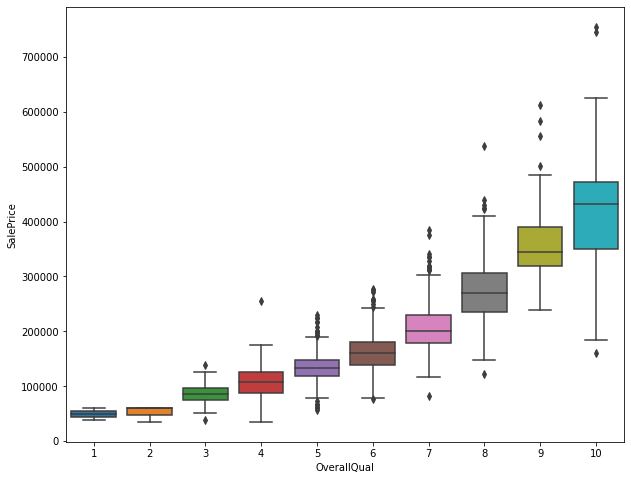

In [0]:
plt.figure(figsize=(10, 8))
sns.boxplot(x=home_data1.OverallQual, y=home_data1.SalePrice)

In [0]:
print("important features")
mat = home_data1.corr()
mat.sort_values(['SalePrice'],ascending=False,inplace=True)
mat.SalePrice

important features


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [0]:
valuenon= pd.DataFrame(home_data1.isnull().sum().sort_values(ascending=False)[:15])
valuenon.columns = ['Null Sum']
valuenon

,Null Sum
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
home_data1 = home_data1.select_dtypes(include=[np.number]).interpolate().dropna()
home_data2 = home_data2.select_dtypes(include=[np.number]).interpolate().dropna()
data_1 = home_data1.drop(['SalePrice','Id'], axis=1)
data_2 = np.log(home_data1.SalePrice)
x_train, x_test, y_train, y_test = train_test_split(data_1,data_2, random_state= 50, test_size=0.2)
li_model = LinearRegression()
li_model.fit(x_train,y_train)
y_linear_regression = li_model.predict(x_test)
print(y_linear_regression)

[12.35225671 12.12553261 11.73873992 11.69101833 12.60470875 12.04234015
 12.02875128 11.97883338 11.9691738  12.11177514 11.83812643 12.07517307
 11.01675601 11.92502757 12.19112277 12.32953495 11.95587172 12.16595523
 12.7060975  11.91103856 12.23612446 13.03389402 11.6925753  11.82514278
 11.73581711 12.1061253  12.41877843 11.58424491 12.68399    12.45681337
 11.81156719 11.77576073 12.20934325 11.79624602 11.44533905 11.83262761
 12.14010528 12.11529207 11.52916038 11.64985803 11.57288196 12.25501088
 11.91457994 12.29962978 11.81655079 12.74269097 11.98048781 12.23322766
 12.13104074 12.21836746 12.30421065 12.34262863 12.09528414 11.87049872
 12.59448167 12.1038081  11.68850372 11.54792759 12.9267679  12.94668741
 11.9218278  11.96601457 12.2418487  11.61433672 12.59907321 12.09800826
 11.55542206 11.9065347  11.57554752 11.70158824 12.20977946 12.38097236
 11.60979668 11.92456591 12.23535492 12.10215412 12.856776   11.71974682
 12.17972674 11.95207816 12.06274899 11.21007479 12

In [0]:
print('Linear Regression:', li_model.score(x_test,y_test))
print('Mean Squared Error: ', mean_squared_error(y_test, y_LR))

Linear Regression: 0.8805557252162494
Mean Squared Error:  0.021327789127512882


In [0]:
import pandas as pd
prediction = pd.DataFrame()
prediction['Id'] = home_data2.Id
home_data2 = home_data2.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()
val = li_model.predict(home_data2)
finalvalues = np.exp(val)
print(finalvalues)

[116380.4549954  136776.92703719 166135.2153423  ... 177152.21631232
 114285.38539884 237255.41175029]


In [0]:
prediction['SalePrice'] = finalvalues
prediction

,Id,SalePrice
0,1461,116380.454995
1,1462,136776.927037
2,1463,166135.215342
3,1464,192943.815748
4,1465,183395.924312
...,...,...
1454,2915,96126.252853
1455,2916,96118.838962
1456,2917,177152.216312
1457,2918,114285.385399
